In [4]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Exploratory Data Analysis (EDA)</b></font> 

# (Work)Sheet just got real
Now it's time to get a taste of real Exploratory Data Analysis, with all of the tools that we gathered so far.
In the following sessions you will start working with data, and start our data exploration and preprocessing phase. 

Preprocessing for what? For Data Science and Machine learning models 💪!

download the file from http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls, and read it as a pandas dataframe

Column description:
- survival: Survival (0 = no; 1 = yes)
- pclass: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)

This is called a **data dictionary**. If you are not the domain expert of your problem, you MUST get one of these from a domain expert / business stakeholder. You should know what your data should look like, acceptable ranges of values, types of values, meaning of each column etc...

Use the time you have to explore it and derive conclusions. The ultimate goal is to predict which of these people survived, but for now - Anything interesting you can say about the data? Plot it, dissect it, be creative. **GO**

# Titanic data

## Import the data

As mentioned before, it is **always** a good idea to look at the head of the data, to see that all the column names and the values are aligned, and contain what we expect. 
Also, look at the dimensions of the data:

In [196]:
import pandas as pd

df = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [6]:
df.shape

(1309, 14)

This means that we have 1309 rows (samples), and 14 columns (features)

## Define - what is my business problem?

What do I want to predict? Do I have the right data for it? 

## Define - which of the features is the dependent feature?

We should decide which feature is the dependent feature - what will we try to predict in the future? This will be important for decisions we make along the way.

The dependent variable has to be the answer to your business problem.

In the Titanic dataset case, the business problem is predicting who survived. So, the dependent feature (AKA target feature) is `survived`. It is a binary vector, where 1 stands for "Survived" and 0 stands for "Did not survive".

The rest of the columns will be called "features" or "independent variables".

## General summary statistics

Another important thing to do, just to get an idea of what our data looks like, is to explore general summary statistics, as well as the contents of each columns (checking for missing values, datatype)

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


What can we say about the data?

We will deal with the missing values in the next session.

## Division to Continuous (Numerical), Nominal and Ordinal features

Before we keep exploring our data, we should mentally divide the features into two main groups - Continuous (Numerical) features and Categorical features.

**Categorical features** are features that represent fixed amount of categories. Most of the time these values will be textual, with or without meaning to order within the categories, but sometimes the data can be numerical. 

**Continuous (Numerical) features** are all features with values within a certain range of numbers. These features are always numerical (`int`, `float`, etc...)

How would you divide the features from the Titanic data?

## Data integrity

It is very important that you check for data integrity:

 1. If your data dictionary states that a column should have certain values and it doesn't - raise a flag
 2. If you have columns that are dependent of eachother but the data does not present this connection - raise a flag
 3. If you have any duplicates - raise a flag / take care of it
 4. If you have rows with the same independent features but different dependent feature - raise a flag. Your model will not know how to deal with this.
 
In our data, one connection is between the `survived` and the `body` column. If there is a body number, it means that the person did not survive. We need to check that that is indeed the case:

In [9]:
assert(df.loc[df['survived'] == 1, 'body'].isnull()).all()

In [10]:
import numpy as np
assert(df.loc[df['body'].notnull(), 'survived'] == False).all()

Let's also check that the age range for the passengers in between 0-120, if we will have negative values, it will be an issue:

In [11]:
df.describe().loc[['min', 'max'], 'age']

min     0.1667
max    80.0000
Name: age, dtype: float64

## Data distribution against the dependent variable

Often, it is useful to look at the independent features, in comparison to the dependent variable, to see any immidiate relations, get a feeling of that to expect, and derive business conclusions for our business stake-holders.

### Categorical features

In [12]:
# crosstab percentage tables for the categorical variables X survived
import numpy as np
cat_vars = ['pclass', 'sex','embarked']
for cat_vat in cat_vars:
    print(pd.crosstab(df[cat_vat],df['survived']).apply(lambda r: 
                                                        round(r/r.sum(),2),
                                                        axis=1), '\n\n')


survived     0     1
pclass              
1         0.38  0.62
2         0.57  0.43
3         0.74  0.26 


survived     0     1
sex                 
female    0.27  0.73
male      0.81  0.19 


survived     0     1
embarked            
C         0.44  0.56
Q         0.64  0.36
S         0.67  0.33 




This is useful, but hard to understand. It would be more beneficial to plot these crosstabs. 

We will be using `seaborn` and `matplotlib` for visualization.

In [13]:
# plotting the crosstabs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

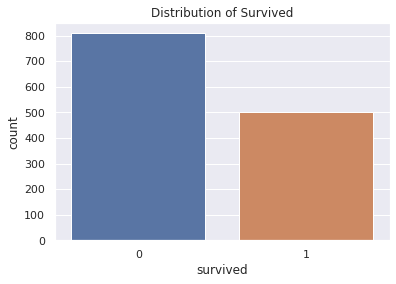

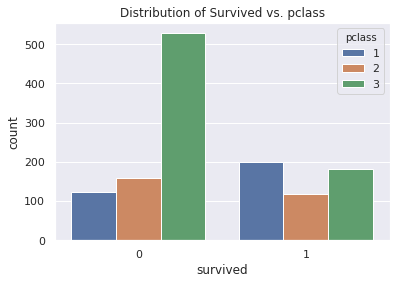

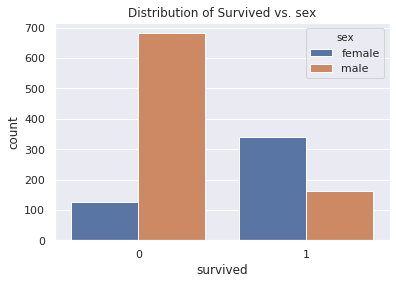

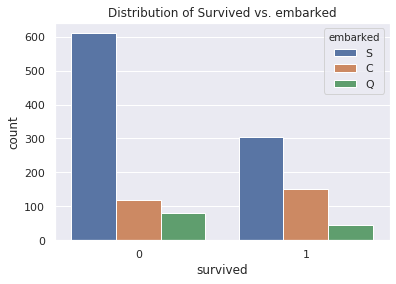

In [14]:
sns.set(style="darkgrid")

ax = sns.countplot(x = df.survived, data=df)
plt.title('Distribution of Survived')
plt.show()

for cat_vat in cat_vars:
    ax = sns.countplot(x = df.survived,  hue = df[cat_vat], data=df)
    plt.title('Distribution of Survived vs. {}'.format(cat_vat))
    plt.show()

Another nice way to look at the data, is by percentage, e.g. what is the percentage of the people who survived, were Female? Let's plot the percentage of values. Do not forget to ease your customer by annotating:

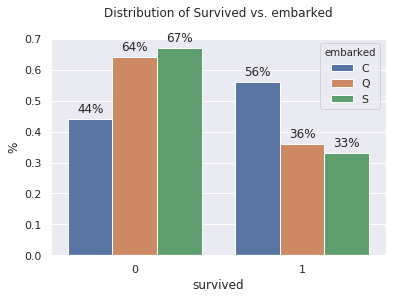

In [15]:
feat = 'embarked'
data = pd.DataFrame(pd.crosstab(df[feat],df['survived']).\
                    apply(lambda r: round(r/r.sum(),2), axis=1).unstack()).\
                    reset_index()

g = sns.barplot(x = data['survived'], y=data[0], hue = data[feat])
plt.title('Distribution of Survived vs. {}\n'.format(feat))
plt.ylabel('%')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0%'), \
               (p.get_x() + p.get_width() / 2., \
                p.get_height()), \
               ha = 'center', \
               va = 'center', \
               xytext = (0, 10), \
               textcoords = 'offset points')

we can see that:
1. the vast majority of pclass 3 didn't survive. In the contrary most of pclass 1 survived
2. most of the female survived while most of the men didn't
3. most of the passangers that embarked in Cherbourg survived, in compare to ~33% in the other ports 

### Numerical features

For numerical features, it's better to look on survival **rates** (average) and not crosstab with survived

In [16]:
# ratio scale data
df[['age', 'sibsp', 'parch', 'fare','survived']].groupby('survived')\
                                                      .agg(['mean', 'median'])

age            sibsp            parch              fare       
               mean median      mean median      mean median       mean median
survived                                                                      
0         30.545369   28.0  0.521632      0  0.328801      0  23.353831   10.5
1         28.918228   28.0  0.462000      0  0.476000      0  49.361184   26.0

We can see from the centred measures that:
1. Age - there is no noticable difference 
2. Number of siblings/spouses aboard - mean is larger in those who didn't survive, however distributaion is skewed
3. Number of parents/children aboard - mean is much larger in those who survived, however distributaion is skewed

Let's put the data on a plot:

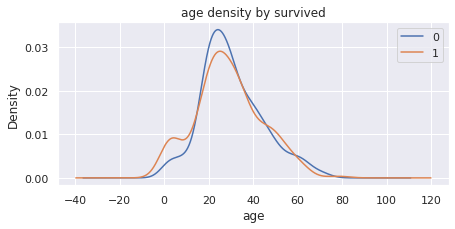

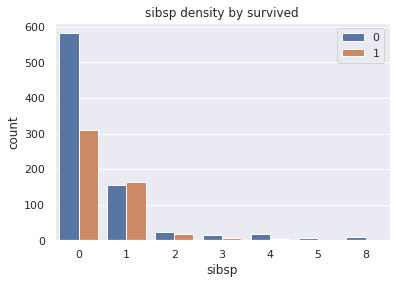

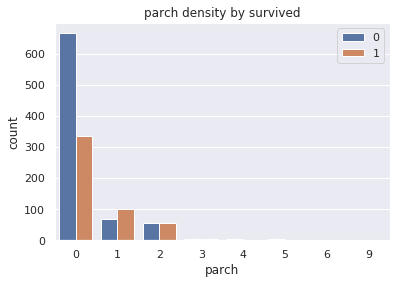

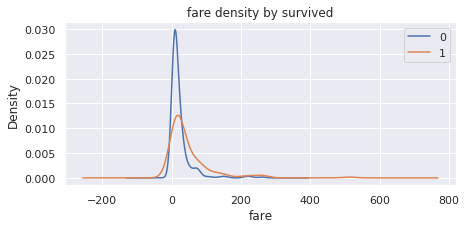

In [17]:
cont_vars = ['age', 'sibsp', 'parch', 'fare']

for cont_var in cont_vars:
    if cont_var not in ['sibsp', 'parch']:
        df.groupby('survived')[cont_var].plot(kind='kde', figsize=(7, 3))
    else: 
        sns.countplot(x=cont_var, hue="survived", data=df)       
    
    plt.legend(loc = 'upper right')
    plt.title(cont_var + ' density by survived')
    plt.xlabel(cont_var)
    plt.show()

## Inter-correlations

Another important thing, is looking at the inner correlations between our features. We won't get into why now, but here is the correlation matrix between the numerical features.

### Numerical vs. Numerical

In [18]:
def color_map(val):
    color = 'red' if float(val) < -0.2 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

corr = df.corr()
df_styled = corr.style.applymap(color_map)
df_styled

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,nan
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,nan,0.058809,-0.099961,0.051099,-0.043110,1.000000


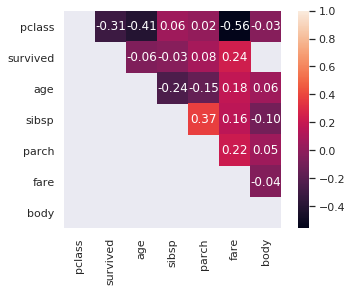

In [19]:
mask = np.tril(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", mask = mask, square = True)


We can also see the relations more graphically:

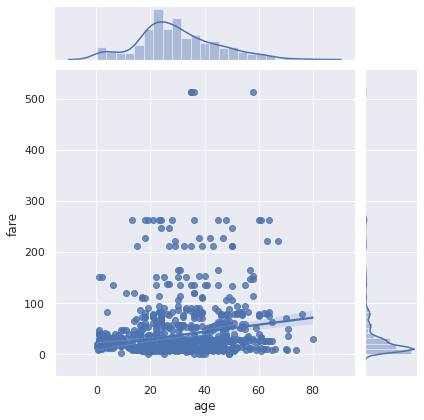

In [20]:
sns.jointplot("age", "fare", data=df, kind='reg');

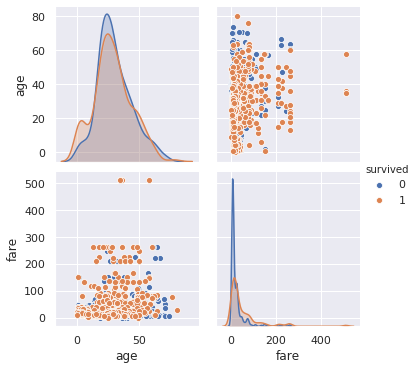

In [21]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

sns.pairplot(df[['age', 'fare', 'survived']].dropna(), 
             hue='survived', height=2.5);

### Categorical vs. Numerical

In [281]:
def display_group_density_plot(df, groupby, on, palette, figsize):
    """
    Displays a density plot by group, given a continuous variable, and a group to split the data by
    :param df: DataFrame to display data from
    :param groupby: Column name by which plots would be grouped (Categorical, maximum 10 categories)
    :param on: Column name of the different density plots
    :param palette: Color palette to use for drawing
    :param figsize: Figure size
    :return: matplotlib.axes._subplots.AxesSubplot object
    """

    if not isinstance(df, pd.core.frame.DataFrame):
        raise ValueError('df must be a pandas DataFrame')

    if not groupby:
        raise ValueError('groupby parameter must be provided')

    elif not groupby in df.keys():
        raise ValueError(groupby + ' column does not exist in the given DataFrame')

    if not on:
        raise ValueError('on parameter must be provided')

    elif not on in df.keys():
        raise ValueError(on + ' column does not exist in the given DataFrame')

    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]

    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.color_palette()[:len(groups)]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on], \
                    shade=True, color=color, label=value
                   )

    ax.set_title(str("Distribution of " + on + " per " + groupby + " group"),\
                 fontsize=30)
    
    ax.set_xlabel(on, fontsize=20)
    return ax 

No handles with labels found to put in legend.


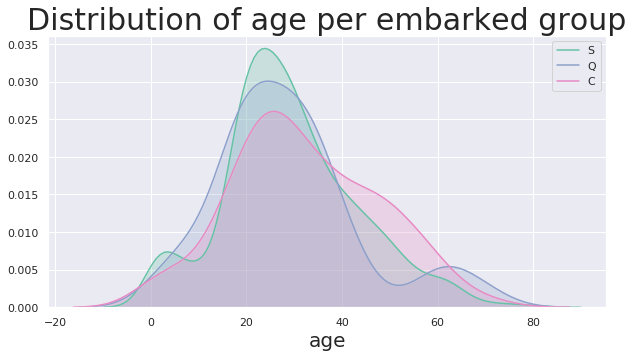

In [282]:
display_group_density_plot(df, groupby = "embarked", on = 'age', \
                                           palette = sns.color_palette('Set2'), 
                           figsize = (10, 5));

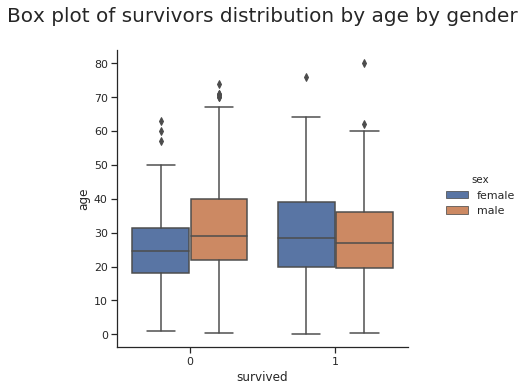

In [283]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("survived", "age", "sex", data=df, kind="box")
    g.set_axis_labels("survived", "age")
    plt.title('Box plot of survivors distribution by age by gender\n', \
              fontdict = {'size':20});

We should take the correlations into considerations when building a model - you will talk about this in the next parts of your traning

# Feature Extraction

We can sometimes make more out of our features. Can you think of some options?


## Exercise

1. Take the time to create 3 additional features.

2. Plot their distribution and give some summary statistics.

3. How are they correlated to other features that exist in the DataFrame? What is theit relation with the dependent variable?

4. Are they categorical / continuous features?

5. What was your logic behind adding these features?



### 1. Creating  additional features.

It will be 'family_size', 'title', 'deck' and 'has_cabin'

  'family_size' feature :  It is created by adding 'SibSp', 'Parch' and 1. 'SibSp' is the count of siblings and spouse, and Parch is the count of parents and children. 
Those columns are added in order to find the total size of families. 
Adding 1 at the end, is the current passenger. 

'title' feature : represents groups of passangers by it title in the name, we separete 5 groups

'has_cabin' feature :  we have a ‘cabin’ column not doing much, only 1st class passengers have cabins, the rest are ‘NaN’. 
so all Nans = no cabine.

'deck' feature: also a cabin number looks like ‘C123’. The letter refers to the deck, and so we’re going to extract these just like the titles.

In [380]:
df = pd.read_excel('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls')
df.head()
df['family_size'] = df.sibsp + df.parch + 1

df['title'] = df.name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df['title'] = df['title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
df['title'] = df['title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                  'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')

df['has_cabin'] = ~df.cabin.isnull()
df['has_cabin'] = df.has_cabin.astype(int)

df['deck']=df['cabin'].dropna().astype(str).str[0]

df_1 = df.copy()
df_1.drop(['name', 'sibsp', 'parch','cabin'], axis=1,  inplace=True )

### 2. Plot the distribution and  some summary statistics

Here we will plot the distribution of age per each of our new created feature

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/gal/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


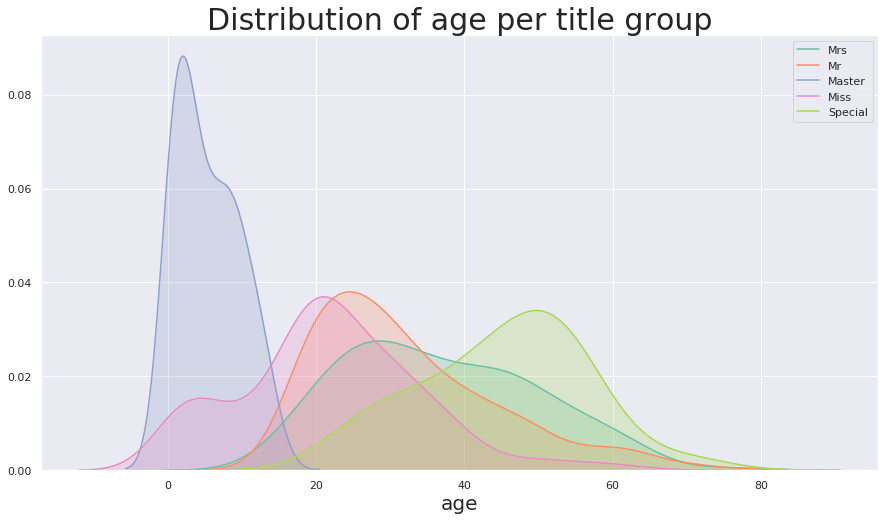

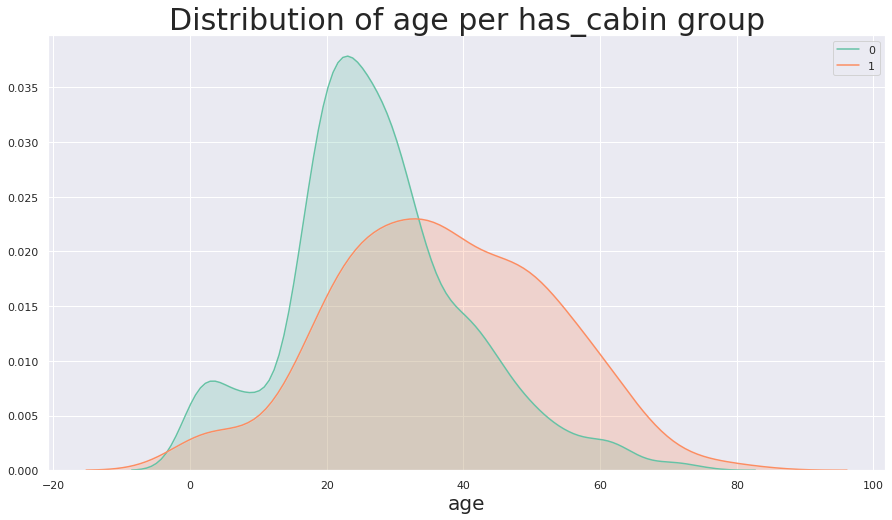

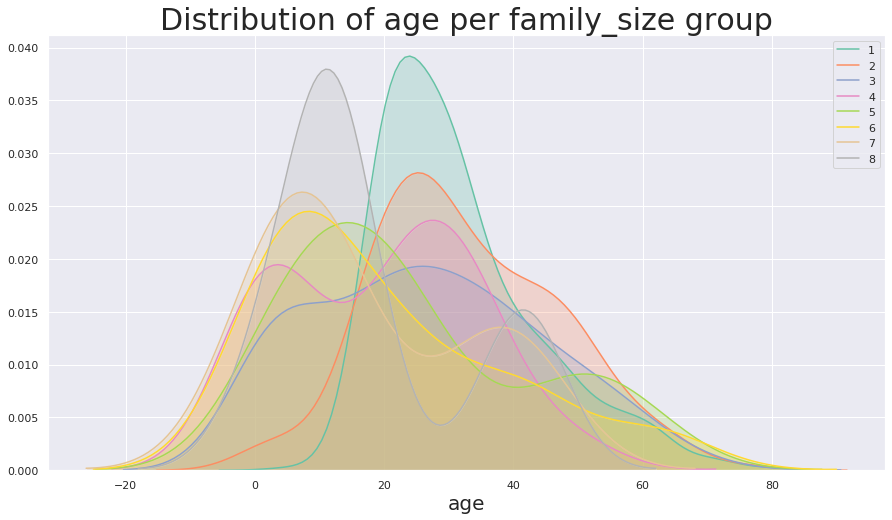

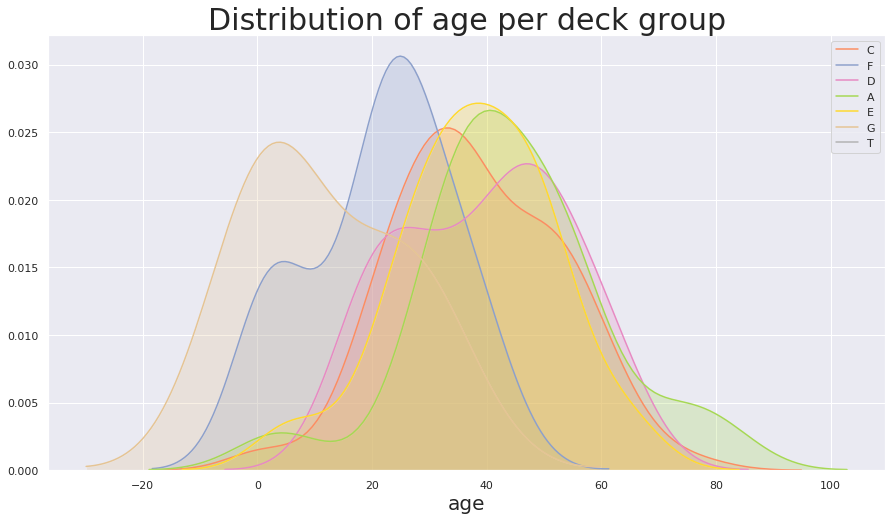

In [381]:
display_group_density_plot(df_1, groupby = "title", on = 'age', \
                                           palette = sns.color_palette('Set2'), figsize = (15, 8));
display_group_density_plot(df_1, groupby = "has_cabin", on = 'age', \
                                           palette = sns.color_palette('Set2'), figsize = (15, 8));  
display_group_density_plot(df_1, groupby = "family_size", on = 'age', \
                                           palette = sns.color_palette('Set2'), figsize = (15, 8));
display_group_density_plot(df, groupby = "deck", on = 'age', \
                                           palette = sns.color_palette('Set2'), figsize = (15, 8));
    

Also down bellow you will find Histograms discribing the destribution survaved for each new feature

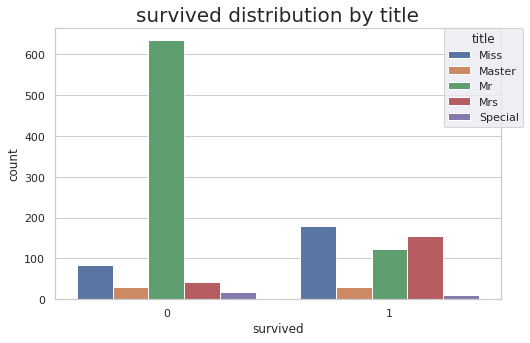

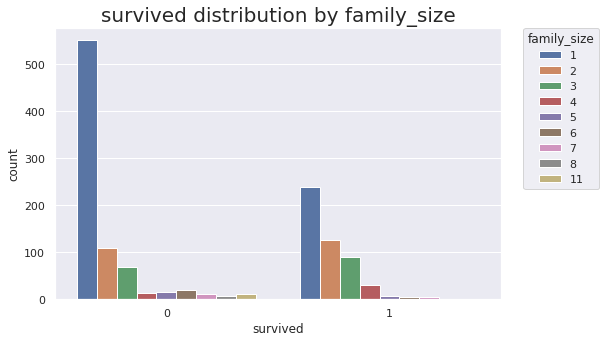

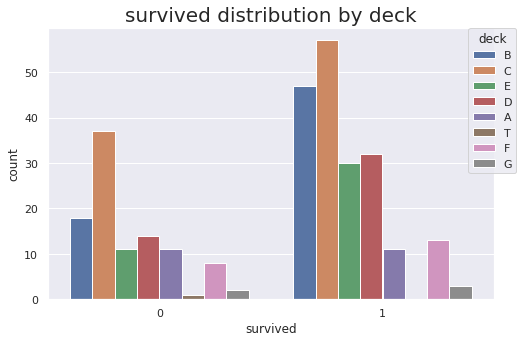

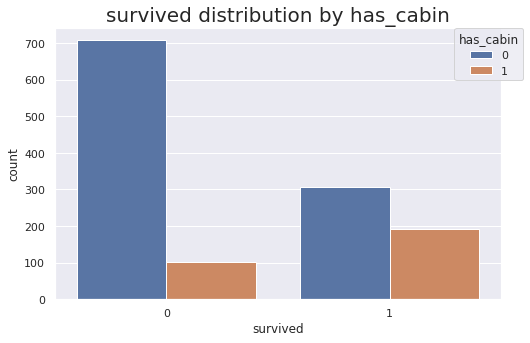

In [399]:
sns.set(style="whitegrid")
for cat_vat in cat_vars:
    ax = sns.countplot(x = df_1.survived,  hue = df_1[cat_vat], data=df_1)
    plt.title('survived distribution by ' + cat_vat , fontsize=20)
    sns.set(rc={'figure.figsize':(8,5)})
    plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0, title=cat_vat)
    plt.show()


1. If we will look at the distribution survived by title, then we will see, that the most survived are 'Miss' and 'Mrs' and the most dead are 'Mr': so 'ladies first' is truth not only words 
2. But most survived by family size are lonely people. Also visible, that familiyes with 2 and 3 people a survived more than dead and this statistic we will see on the histogrammes below. As we can see, families with big number of members (over 4) couldn't survived
3. The distribution by deck tells us that the majority of survived were from the deck 'C' and 'B', and also a little less from 'D' and 'E'.
4. The distribution of survived by cabine tells that 2/3 of those who has the cabine were survived and only less than half of those who hasn't 

##### but let us look at the statistics deeper

###### this is 'categorical' statistics

In [384]:
from bubble_plot.utils import describe_categorical_values
describe_categorical_values(df_1, non_interesting_columns=df_1.describe().columns, num_categories=6)

,0,1,2,3,4,5
sex,male: 64%,female: 36%,None,None,None,None
ticket,CA. 2343: 1%,1601: 1%,CA 2144: 1%,347082: 1%,3101295: 1%,S.O.C. 14879: 1%
embarked,S: 70%,C: 21%,Q: 9%,nan: 0%,None,None
boat,nan: 63%,13: 3%,C: 3%,15: 3%,14: 3%,4: 2%
home.dest,nan: 43%,"New York, NY: 5%",London: 1%,"Montreal, PQ: 1%","Cornwall / Akron, OH: 1%","Paris, France: 1%"
title,Mr: 58%,Miss: 20%,Mrs: 15%,Master: 5%,Special: 2%,None
deck,nan: 77%,C: 7%,B: 5%,D: 4%,E: 3%,A: 2%


##### and here the numerical satatistic data

In [385]:
df_1.describe()

,pclass,survived,age,fare,body,family_size,has_cabin
count,1309.000000,1309.000000,1046.000000,1308.000000,121.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,33.295479,160.809917,1.883881,0.225363
std,0.837836,0.486055,14.413500,51.758668,97.696922,1.583639,0.417981
min,1.000000,0.000000,0.166700,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,21.000000,7.895800,72.000000,1.000000,0.000000
50%,3.000000,0.000000,28.000000,14.454200,155.000000,1.000000,0.000000
75%,3.000000,1.000000,39.000000,31.275000,256.000000,2.000000,0.000000
max,3.000000,1.000000,80.000000,512.329200,328.000000,11.000000,1.000000


###### summary statistics  by each new feature which we will see on the plots or olready saw


In [296]:
cat_vars = ['title', 'family_size','deck','has_cabin']
for cat_vat in cat_vars:
    print(pd.crosstab(df_1[cat_vat],df_1['survived']).apply(lambda r: round(r/r.sum(),2), axis=1), '\n\n')

survived     0     1
title               
Master    0.49  0.51
Miss      0.32  0.68
Mr        0.84  0.16
Mrs       0.21  0.79
Special   0.62  0.38 


survived        0     1
family_size            
1            0.70  0.30
2            0.46  0.54
3            0.43  0.57
4            0.30  0.70
5            0.73  0.27
6            0.80  0.20
7            0.75  0.25
8            1.00  0.00
11           1.00  0.00 


survived     0     1
deck                
A         0.50  0.50
B         0.28  0.72
C         0.39  0.61
D         0.30  0.70
E         0.27  0.73
F         0.38  0.62
G         0.40  0.60
T         1.00  0.00 


survived      0     1
has_cabin            
0          0.70  0.30
1          0.35  0.65 




##### a table  which show the mean and median data grouped by deck

In [298]:
df_deck = df_1[['age', 'family_size', 'fare','survived','has_cabin','deck','title']].groupby('deck').agg(['mean', 'median'])
df_deck

age        family_size               fare           survived  \
           mean median        mean median        mean   median      mean   
deck                                                                       
A     44.157895   41.0    1.363636      1   41.244314  35.0771  0.500000   
B     36.476190   35.0    2.107692      2  122.383078  82.2667  0.723077   
C     38.382752   37.0    2.095745      2  107.926598  86.2896  0.606383   
D     39.702381   42.0    1.673913      2   53.007339  52.5542  0.695652   
E     38.118421   39.0    1.731707      2   54.564634  53.1000  0.731707   
F     21.333333   24.5    1.952381      1   18.079367  13.0000  0.619048   
G     12.000000    4.0    2.800000      3   14.205000  16.7000  0.600000   
T     45.000000   45.0    1.000000      1   35.500000  35.5000  0.000000   

            has_cabin         
     median      mean median  
deck                          
A       0.5         1      1  
B       1.0         1      1  
C       1.0         1      1  
D       1.0         1      1  
E       1.0         1      1  
F       1.0         1      1  
G       1.0         1      1  
T       0.0         1      1

##### a table  which show the mean and median data grouped by title

In [299]:
df_title = df_1[['age', 'family_size', 'fare','survived','has_cabin', 'title']].groupby('title').agg(['mean', 'median'])
df_title

age        family_size              fare            survived  \
              mean median        mean median       mean    median      mean   
title                                                                         
Master    5.482704    4.0    4.426230      3  36.008195  26.00000  0.508197   
Miss     21.824335   22.0    2.151515      1  42.566747  15.24580  0.678030   
Mr       32.252151   29.0    1.442536      1  24.796185   9.59375  0.162483   
Mrs      36.918129   35.0    2.484848      2  50.655366  26.12500  0.787879   
Special  45.178571   47.5    1.517241      1  46.230603  28.50000  0.379310   

               has_cabin         
        median      mean median  
title                            
Master       1  0.147541      0  
Miss         1  0.227273      0  
Mr           0  0.178336      0  
Mrs          1  0.388889      0  
Special      0  0.482759      0

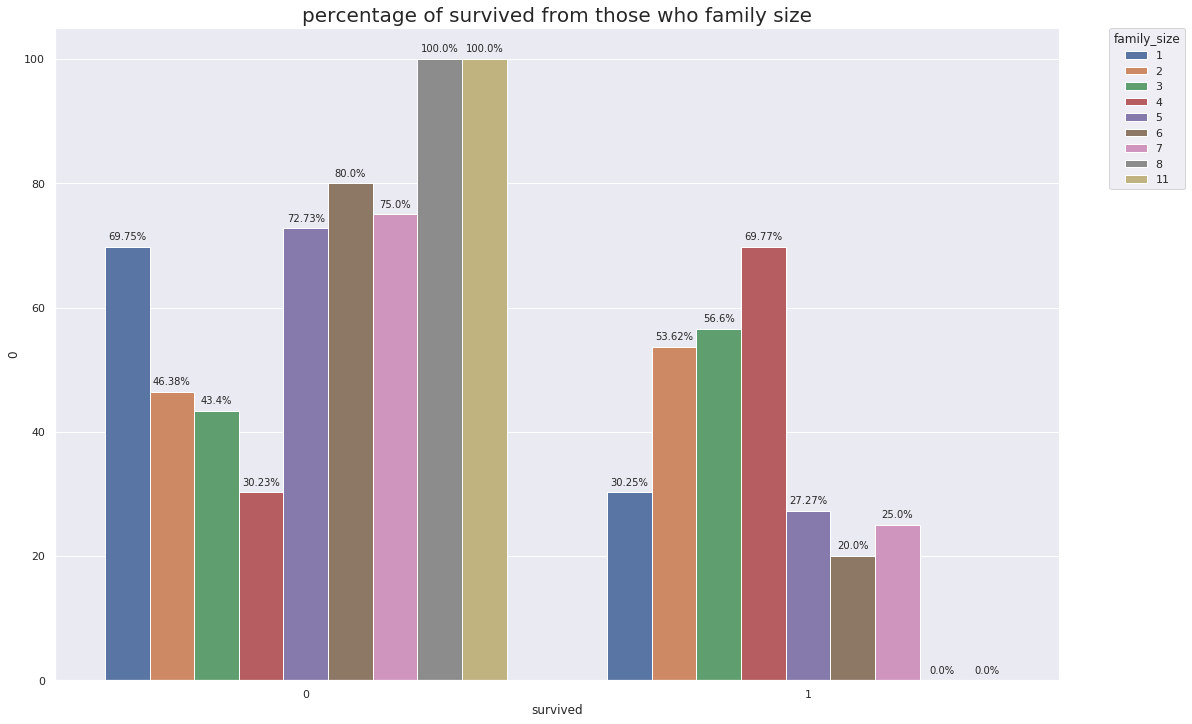

In [408]:
feat = 'family_size'
data = pd.DataFrame(pd.crosstab(df_1[feat],df_1['survived']).\
                    apply(lambda r: round(r/r.sum()*100,2), axis=1).unstack()).\
                    reset_index()

g = sns.barplot(x = data['survived'], y=data[0], hue = data[feat])
sns.set(rc={'figure.figsize':(18,15)})
for p in g.patches:
    g.annotate('{}%'.format(p.get_height(), '.2f'), \
               (p.get_x() + p.get_width() / 2., \
                p.get_height()), \
               ha = 'center', \
               va = 'center', \
               xytext = (0, 10), \
               textcoords = 'offset points',\
               size = 10,
           )
    plt.title('percentage of survived from those who family size', fontSize=20)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=feat)

##### on this histogram :
1. It's very clear that families with 11 and 8 members were dead all but no one group who were survived all
2. The most survived pecent have families with 4 members - almost 70%
3. The lowes persent of surviving after those who totaly dead in paragraph 1 have 80% (6 members) of death and 75% (7 members)

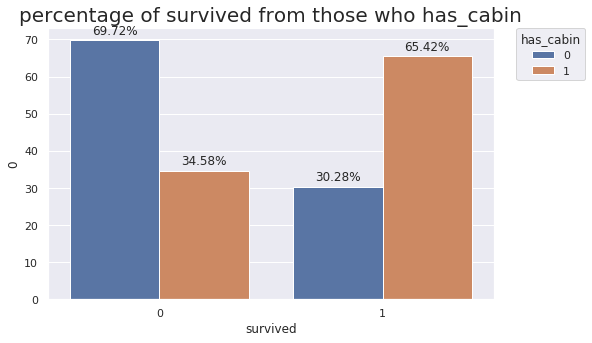

In [401]:
feat = 'has_cabin'
data = pd.DataFrame(pd.crosstab(df[feat],df['survived']).\
                    apply(lambda r: round(r/r.sum()*100,2), axis=1).unstack()).\
                    reset_index()

g = sns.barplot(x = data['survived'], y=data[0], hue = data[feat])
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title('percentage of survived from those who has_cabin', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0, title=feat)
for p in g.patches:
    g.annotate('{}%'.format(p.get_height(), '.2f'), \
               (p.get_x() + p.get_width() / 2., \
                p.get_height()), \
               ha = 'center', \
               va = 'center', \
               xytext = (0, 10), \
               textcoords = 'offset points')

##### on this plot we see:
1. 65.42% of survived has cabine and 30,28% hasn't it
2. almost 70% of dead hasn't the cabine and only 34,58% of not survived has the cabine

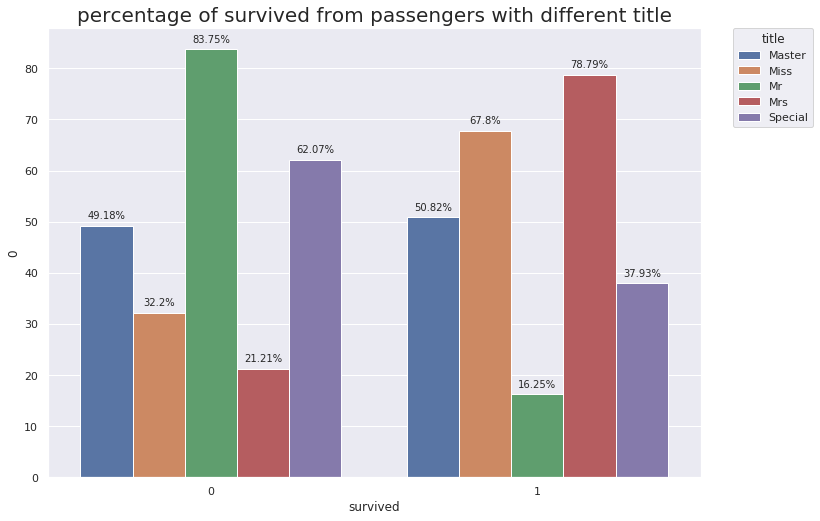

In [405]:
feat = 'title'
data = pd.DataFrame(pd.crosstab(df_1[feat],df_1['survived']).\
                    apply(lambda r: round(r/r.sum()*100,2), axis=1).unstack()).\
                    reset_index()

g = sns.barplot(x = data['survived'], y=data[0], hue = data[feat])
sns.set(rc={'figure.figsize':(11.7,8.27)})
for p in g.patches:
    g.annotate('{}%'.format(p.get_height(), '.2f'), \
               (p.get_x() + p.get_width() / 2., \
                p.get_height()), \
               ha = 'center', \
               va = 'center', \
               xytext = (0, 10), \
               textcoords = 'offset points',\
               size = 10,
           )
    plt.title('percentage of survived from passengers with different title', fontsize=20)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=feat)

###### on this histogram you can see:
1. Married and not married ladies has a very high percent of surviving and married ladies are the most (maybe it is because of responsibility and life experience)
2. Men who are 'Mr's are diying more than surviving
3. People with 'Spesial' title on the second place of the worst survived after people with 'Mr' title

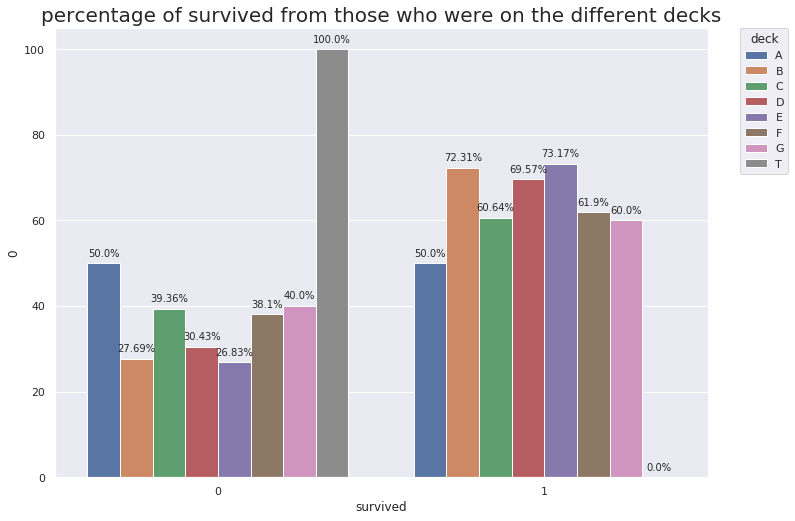

In [406]:
feat = 'deck'
data = pd.DataFrame(pd.crosstab(df[feat],df['survived']).\
                    apply(lambda r: round(r/r.sum()*100,2), axis=1).unstack()).\
                    reset_index()

g = sns.barplot(x = data['survived'], y=data[0], hue = data[feat])
sns.set(rc={'figure.figsize':(11.7,8.27)})
for p in g.patches:
    g.annotate('{}%'.format(p.get_height(), '.2f'), \
               (p.get_x() + p.get_width() / 2., \
                p.get_height()), \
               ha = 'center', \
               va = 'center', \
               xytext = (0, 10), \
               textcoords = 'offset points',\
               size = 10,
           )
    plt.title('percentage of survived from those who were on the different decks', fontsize=20)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=feat)

###### on this plot you can see the pecentage survived and not survived inside the 'deck group'
1. Nobody survived who was on the lowest T deck
2. From deck A half of people didn't survived
3. Decks 'C','F' and 'G' got almost 60% of survives and about 40% were dead
4. The most survived decks were 'B', 'D' and 'E': % of deth there were the lowest - about 26-30%)

### 3. The correlation

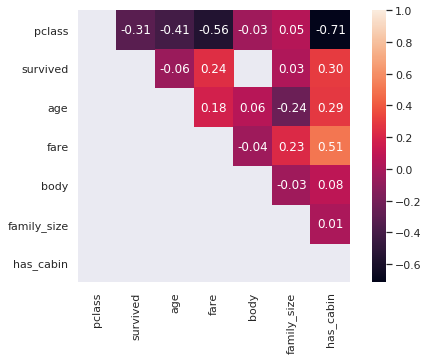

In [389]:
# 3. How are they correlated to other features that exist in the DataFrame?
mask = np.tril(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(df_1.corr(), annot=True, fmt=".2f", mask = mask, square = True)
plt.show()
# What is theit relation with the dependent variable?

1. It is visible that 'fare' and 'pclass' have high negative correlation 
2. Also 'has_cabine' is highly negative corelated with 'pclass and 'fare and much less with 'age'
3. The new feature 'family_size' has a very small correlation with 'age' and 'fare'


On this color matrix also visible other correleted and non-correlated features

In [410]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.4  else 'black'
    return 'color: %s' % color
df_styled = df_1.corr().style.applymap(color_map)
display(df_styled)

,pclass,survived,age,fare,body,family_size,has_cabin
pclass,1.000000,-0.312469,-0.408106,-0.558629,-0.034642,0.050027,-0.713857
survived,-0.312469,1.000000,-0.055513,0.244265,nan,0.026876,0.302250
age,-0.408106,-0.055513,1.000000,0.178739,0.058809,-0.240230,0.289740
fare,-0.558629,0.244265,0.178739,1.000000,-0.043110,0.226492,0.507253
body,-0.034642,nan,0.058809,-0.043110,1.000000,-0.033628,0.083796
family_size,0.050027,0.026876,-0.240230,0.226492,-0.033628,1.000000,0.014155
has_cabin,-0.713857,0.302250,0.289740,0.507253,0.083796,0.014155,1.000000


### 4. Are they categorical / continuous features?

these new features are categorical (deck, title, has_cabine) and numrical(family_size)

###  5. What was your logic behind adding these features?
my logic was followed the bussines logic - try to find the correlation between the features to find the way next time to predict death and keep the passanger alive